In [2]:
import pandas as pd

# Cargar el dataframe limpio desde el archivo pickle
df = pd.read_pickle('data_limpia.pkl')

# Ver las primeras filas para confirmar que se cargó correctamente
print(df.head())
print(f"Dimensiones del dataset: {df.shape}")
print(f"Columnas: {df.columns.tolist()}")

    age  monthly_inhand_salary  num_bank_accounts  num_credit_card  \
0  23.0            1824.843333                3.0              4.0   
1  23.0            1426.204829                3.0              4.0   
2  40.8            2059.822083                3.0              4.0   
3  23.0            1661.386500                3.0              4.0   
4  23.0            1824.843333                3.0              4.0   

   interest_rate  delay_from_due_date  num_of_delayed_payment  \
0            3.0                    3                     7.0   
1            3.0                   -1                     7.6   
2            3.0                    3                     7.0   
3            3.0                    5                     4.0   
4            3.0                    6                     8.6   

   changed_credit_limit  num_credit_inquiries  outstanding_debt  ...  \
0                 11.27                   4.0            809.98  ...   
1                 11.27                   4.

In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Codificar variables categóricas
X_encoded = X.copy()
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col].astype(str))

# Codificar target
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [7]:
y

0            Good
1            Good
2            Good
3            Good
4            Good
           ...   
99995        Poor
99996        Poor
99997        Poor
99998    Standard
99999        Poor
Name: credit_score, Length: 100000, dtype: object

In [ ]:
y_encoded

array([0, 0, 0, ..., 1, 2, 1])

## K-Nearest Neighbors (KNN) Classifier

🚀 INICIANDO KNN - MODELO BENCHMARK...
✅ Datos preparados: 70000 train, 30000 test

🔍 BUSCANDO MEJOR PARÁMETRO K...
📊 RESULTADOS POR VALOR DE k:
    k  cv_mean  cv_std
0   3   0.7140  0.0015
1   5   0.7086  0.0009
2   7   0.7077  0.0015
3   9   0.7037  0.0017
4  11   0.7018  0.0016
5  15   0.6967  0.0026
6  20   0.6930  0.0021

✅ MEJOR k: 3 (CV Score: 0.7140)

🎯 ENTRENANDO MODELO FINAL CON k=3...

📈 EVALUANDO MODELO KNN...
📊 MÉTRICAS DEL MODELO KNN:
     Métrica   Valor
0   Accuracy  0.7718
1  Precision  0.7728
2     Recall  0.7718
3   F1-Score  0.7720
4    CV_Mean  0.7663
5     CV_Std  0.0023

📋 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

        Good       0.70      0.72      0.71      5349
        Poor       0.76      0.80      0.78      8699
    Standard       0.80      0.78      0.79     15952

    accuracy                           0.77     30000
   macro avg       0.76      0.76      0.76     30000
weighted avg       0.77      0.77      0.77  

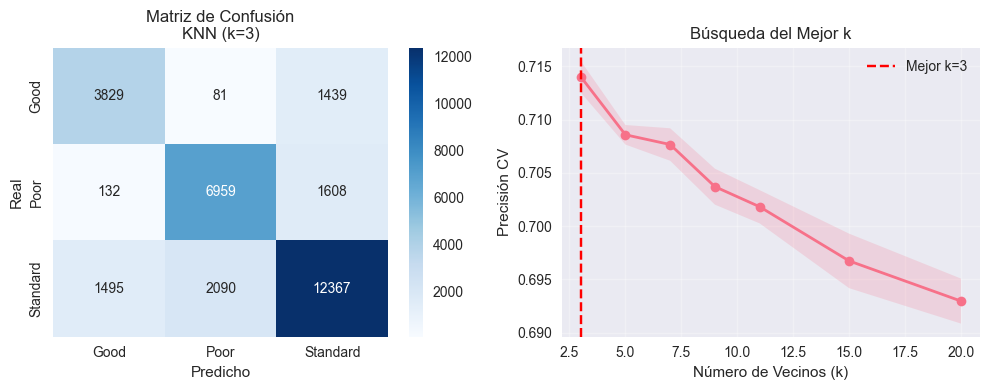


🔍 ANÁLISIS DE ERRORES POR CLASE:
Accuracy por clase:
  Good: 0.7158 (71.58%)
  Poor: 0.8000 (80.00%)
  Standard: 0.7753 (77.53%)

🎯 RESUMEN FINAL - KNN BENCHMARK
⏱️  Tiempo ejecución: 77.01s
🔧 Parámetros: k=3, weights=distance, metric=manhattan
📈 Accuracy: 0.7718 (77.18%)
🎯 Validación Cruzada: 0.7663 ± 0.0045

📊 Distribución clases:
   Standard: 53174 (53.2%)
   Poor: 28998 (29.0%)
   Good: 17828 (17.8%)

🎯 EVALUACIÓN: ✅ BUENO

💾 Resultados guardados: 'knn_benchmark_results.pkl'


In [ ]:
# =============================================================================
# KNN - MODELO BENCHMARK
# =============================================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🚀 INICIANDO KNN - MODELO BENCHMARK...")
start_time = time.time()

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Codificar variables categóricas
X_encoded = X.copy()
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col].astype(str))

# Codificar target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split de datos
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# Escalado (crítico para KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✅ Datos preparados: {X_train_scaled.shape[0]} train, {X_test_scaled.shape[0]} test")

# =============================================================================
# BÚSQUEDA RÁPIDA DEL MEJOR K
# =============================================================================

print("\n🔍 BUSCANDO MEJOR PARÁMETRO K...")

k_values = [3, 5, 7, 9, 11, 15, 20]
knn_results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    
    # Validación cruzada
    cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=3, scoring='accuracy')
    
    knn_results.append({
        'k': k,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    })

# Crear tabla de resultados
knn_results_df = pd.DataFrame(knn_results)


best_idx = knn_results_df['cv_mean'].idxmax()
best_k = int(knn_results_df.loc[best_idx, 'k']) 
best_cv_score = knn_results_df.loc[best_idx, 'cv_mean']

print("📊 RESULTADOS POR VALOR DE k:")
print(knn_results_df.round(4))
print(f"\n✅ MEJOR k: {best_k} (CV Score: {best_cv_score:.4f})")

# =============================================================================
# ENTRENAMIENTO DEL MODELO FINAL
# =============================================================================

print(f"\n🎯 ENTRENANDO MODELO FINAL CON k={best_k}...")

knn_final = KNeighborsClassifier(
    n_neighbors=best_k,  # Ahora es un int
    weights='distance',
    metric='manhattan',
    n_jobs=-1
)

knn_final.fit(X_train_scaled, y_train)

# Predicciones
y_pred = knn_final.predict(X_test_scaled)
y_pred_proba = knn_final.predict_proba(X_test_scaled)

# =============================================================================
# EVALUACIÓN COMPLETA
# =============================================================================

print("\n📈 EVALUANDO MODELO KNN...")

# Métricas principales
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Validación cruzada final
cv_scores_final = cross_val_score(knn_final, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Crear tabla de métricas
metrics_table = pd.DataFrame({
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'CV_Mean', 'CV_Std'],
    'Valor': [accuracy, precision, recall, f1, cv_scores_final.mean(), cv_scores_final.std()]
})

print("📊 MÉTRICAS DEL MODELO KNN:")
print(metrics_table.round(4))

# Reporte de clasificación
print("\n📋 REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# =============================================================================
# VISUALIZACIONES E
# =============================================================================

# 1. Matriz de confusión
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Matriz de Confusión\nKNN (k={best_k})')
plt.ylabel('Real')
plt.xlabel('Predicho')

# 2. Gráfico de búsqueda de k
plt.subplot(1, 2, 2)
plt.plot(knn_results_df['k'], knn_results_df['cv_mean'], marker='o', linewidth=2)
plt.fill_between(knn_results_df['k'], 
                 knn_results_df['cv_mean'] - knn_results_df['cv_std'],
                 knn_results_df['cv_mean'] + knn_results_df['cv_std'], alpha=0.2)
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Mejor k={best_k}')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Precisión CV')
plt.title('Búsqueda del Mejor k')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# ANÁLISIS DE ERRORES POR CLASE
# =============================================================================

print("\n🔍 ANÁLISIS DE ERRORES POR CLASE:")

# Calcular accuracy por clase
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
class_accuracy = cm.diagonal() / cm.sum(axis=1)

print("Accuracy por clase:")
for i, cls in enumerate(le.classes_):
    print(f"  {cls}: {class_accuracy[i]:.4f} ({class_accuracy[i]*100:.2f}%)")

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*60)
print("🎯 RESUMEN FINAL - KNN BENCHMARK")
print("="*60)

print(f"⏱️  Tiempo ejecución: {execution_time:.2f}s")
print(f"🔧 Parámetros: k={best_k}, weights=distance, metric=manhattan")
print(f"📈 Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"🎯 Validación Cruzada: {cv_scores_final.mean():.4f} ± {cv_scores_final.std()*2:.4f}")

# Distribución de clases
class_dist = pd.Series(le.inverse_transform(y_encoded)).value_counts()
print(f"\n📊 Distribución clases:")
for cls, count in class_dist.items():
    pct = (count / len(y_encoded)) * 100
    print(f"   {cls}: {count} ({pct:.1f}%)")

# Evaluación cualitativa
if accuracy > 0.8:
    performance = "🌟 EXCELENTE"
elif accuracy > 0.7:
    performance = "✅ BUENO"
elif accuracy > 0.6:
    performance = "⚠️  ACEPTABLE"
else:
    performance = "❌ MEJORABLE"

print(f"\n🎯 EVALUACIÓN: {performance}")

# Guardar modelo para benchmark comparativo
benchmark_data = {
    'model': 'KNN',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'cv_mean': cv_scores_final.mean(),
    'cv_std': cv_scores_final.std(),
    'best_k': best_k,
    'execution_time': execution_time,
    'performance': performance
}

joblib.dump(benchmark_data, 'knn_benchmark_results.pkl')
print(f"\n💾 Resultados guardados: 'knn_benchmark_results.pkl'")

print("="*60)

## Naive Bayes

🚀 INICIANDO NAIVE BAYES - MODELO BENCHMARK...
✅ Datos preparados: 70000 train, 30000 test

🎯 ENTRENANDO MODELO 

📈 EVALUANDO MODELO BAYESIANO...

📋 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

        Good       0.46      0.84      0.60      5349
        Poor       0.62      0.71      0.66      8699
    Standard       0.83      0.54      0.65     15952

    accuracy                           0.64     30000
   macro avg       0.64      0.70      0.64     30000
weighted avg       0.70      0.64      0.64     30000



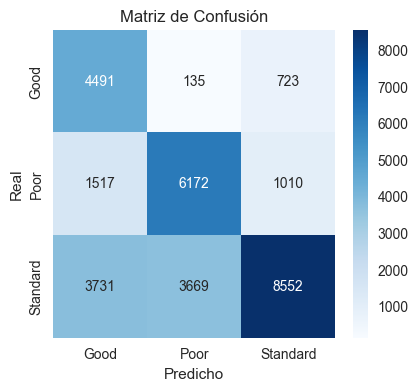


🔍 ANÁLISIS DE ERRORES POR CLASE:
Accuracy por clase:
  Good: 0.8396 (83.96%)
  Poor: 0.7095 (70.95%)
  Standard: 0.5361 (53.61%)

🎯 RESUMEN FINAL - NAIVE BAYES BENCHMARK
⏱️  Tiempo ejecución: 0.36s

🎯 EVALUACIÓN: ⚠️  ACEPTABLE

💾 Resultados guardados: 'bayes_benchmark_results.pkl'


In [ ]:
# =============================================================================
# Naive Bayes - MODELO BENCHMARK
# =============================================================================

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🚀 INICIANDO NAIVE BAYES - MODELO BENCHMARK...")
start_time = time.time()

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================


# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

y = y.map({
    'Good': 0,
    'Poor': 1,
    'Standard': 2
    
})


# Seleccionamos las variables numericas a estandarizar
num_cols=['age', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

# Seleccionamos las variables categóricas a codificar
cat_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour']
# Se no se toman las variables binarias ya que estas ya pueden considerarse
# como codificadas


# Split de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Codificación de categóricas
ohe = OneHotEncoder(drop="first", handle_unknown="ignore", sparse=False)

X_train_cat = ohe.fit_transform(X_train[cat_cols])
X_test_cat = ohe.transform(X_test[cat_cols])

# Estandarización de numéricas
scaler = StandardScaler()

X_train_num = scaler.fit_transform(X_train[num_cols])
X_test_num = scaler.transform(X_test[num_cols])

# Combinar numéricas y categóricas
X_train_final = np.hstack([X_train_num, X_train_cat])
X_test_final = np.hstack([X_test_num, X_test_cat])



print(f"✅ Datos preparados: {X_train_final.shape[0]} train, {X_test_final.shape[0]} test")

# =============================================================================
# ENTRENAMIENTO DEL MODELO 
# =============================================================================

print(f"\n🎯 ENTRENANDO MODELO ")

bayes=GaussianNB()
bayes.fit(X_train_final,y_train)

# Predicciones
y_pred = bayes.predict(X_test_final)


# =============================================================================
# EVALUACIÓN COMPLETA
# =============================================================================

print("\n📈 EVALUANDO MODELO BAYESIANO...")

# Métricas principales
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# Reporte de clasificación
print("\n📋 REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test, y_pred, target_names=['Good', 'Poor', 'Standard']))

# =============================================================================
# VISUALIZACIONES 
# =============================================================================

# 1. Matriz de confusión
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Good', 'Poor', 'Standard'], yticklabels=['Good', 'Poor', 'Standard'])
plt.title(f'Matriz de Confusión')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()

# =============================================================================
# ANÁLISIS DE ERRORES POR CLASE
# =============================================================================

print("\n🔍 ANÁLISIS DE ERRORES POR CLASE:")

# Calcular accuracy por clase
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
class_accuracy = cm.diagonal() / cm.sum(axis=1)

print("Accuracy por clase:")
for i, cls in enumerate(['Good', 'Poor', 'Standard']):
    print(f"  {cls}: {class_accuracy[i]:.4f} ({class_accuracy[i]*100:.2f}%)")

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time


print("\n" + "="*60)
print("🎯 RESUMEN FINAL - NAIVE BAYES BENCHMARK")
print("="*60)
print(f"⏱️  Tiempo ejecución: {execution_time:.2f}s")

# Evaluación cualitativa
if f1 > 0.8:
    performance = "🌟 EXCELENTE"
elif f1 > 0.7:
    performance = "✅ BUENO"
elif f1 > 0.6:
    performance = "⚠️  ACEPTABLE"
else:
    performance = "❌ MEJORABLE"

print(f"\n🎯 EVALUACIÓN: {performance}")

# Guardar modelo para benchmark comparativo
benchmark_data = {
    'model': 'GaussianNB',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'execution_time': execution_time,
    'performance': performance
}

joblib.dump(benchmark_data, 'bayes_benchmark_results.pkl')
print(f"\n💾 Resultados guardados: 'bayes_benchmark_results.pkl'")

print("="*60)

##  Regresión Logística (con regularización L1 y L2)

🚀 INICIANDO REGRESIÓN LOGÍSTICA - MODELO BENCHMARK...
✅ Datos preparados: 70000 train, 30000 test

🔍 COMPARANDO REGULARIZACIÓN L1 vs L2...


C:\Users\Luis D Peñaranda\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\Luis D Peñaranda\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\Luis D Peñaranda\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


  L1 C=0.001: 0.6277


C:\Users\Luis D Peñaranda\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\Luis D Peñaranda\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\Luis D Peñaranda\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


  L1 C=0.01: 0.6323


C:\Users\Luis D Peñaranda\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\Luis D Peñaranda\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\Luis D Peñaranda\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


  L1 C=0.1: 0.6365


C:\Users\Luis D Peñaranda\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\Luis D Peñaranda\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\Luis D Peñaranda\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


  L1 C=1: 0.6364


C:\Users\Luis D Peñaranda\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\Luis D Peñaranda\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\Luis D Peñaranda\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


  L1 C=10: 0.6363


C:\Users\Luis D Peñaranda\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\Luis D Peñaranda\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\Luis D Peñaranda\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


  L1 C=100: 0.6364
  L2 C=0.001: 0.5896
  L2 C=0.01: 0.5909
  L2 C=0.1: 0.5899
  L2 C=1: 0.5874
  L2 C=10: 0.5920
  L2 C=100: 0.5887

📊 MEJORES PARÁMETROS ENCONTRADOS:
   L1 (Lasso): C=0.1, CV Score: 0.6365
   L2 (Ridge): C=10.0, CV Score: 0.5920

✅ MEJOR CONFIGURACIÓN OVERALL: L1 con C=0.1

🎯 ENTRENANDO MODELOS FINALES...


C:\Users\Luis D Peñaranda\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(



📈 EVALUANDO MODELOS DE REGRESIÓN LOGÍSTICA...
📊 COMPARACIÓN DE MODELOS:
      Modelo  Accuracy  Precision  Recall  F1-Score
0  LogReg L1    0.6363     0.6339  0.6363    0.6302
1  LogReg L2    0.5909     0.5780  0.5909    0.5572
2  LogReg L1    0.6363     0.6339  0.6363    0.6302


C:\Users\Luis D Peñaranda\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\Luis D Peñaranda\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\Luis D Peñaranda\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\Luis D Peñaranda\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\Luis D Peñaranda\AppData\Roaming\Python\Python3


🔍 ANÁLISIS DE COEFICIENTES - L1:
Top 10 características más importantes por clase:

📊 Clase 'Good':
                  Feature  Coefficient
17             credit_mix      -0.6328
18  payment_of_min_amount      -0.2902
4         num_credit_card      -0.2509
19      payment_behaviour      -0.1287
21    credit_builder_loan       0.0638
5           interest_rate      -0.0637
22          personal_loan      -0.0597
20          not_specified       0.0538
26          mortgage_loan       0.0469
6     delay_from_due_date      -0.0394

📊 Clase 'Poor':
                 Feature  Coefficient
4        num_credit_card       0.1372
19     payment_behaviour       0.1178
17            credit_mix      -0.1037
9   num_credit_inquiries       0.0773
8   changed_credit_limit      -0.0627
5          interest_rate       0.0565
24          student_loan       0.0415
28      home_equity_loan      -0.0407
27             auto_loan       0.0401
25           payday_loan      -0.0374

📊 Clase 'Standard':
              

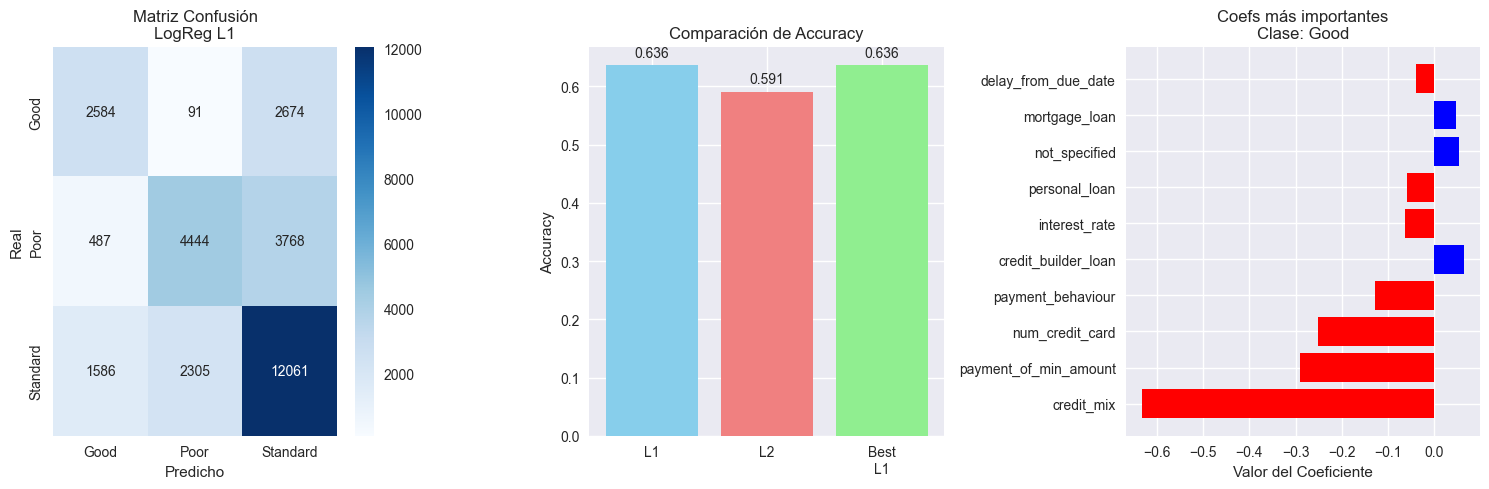


🔍 ANÁLISIS DE SPARSITY:
L1 - Coeficientes no cero: 84/87 (96.6%)
L2 - Coeficientes no cero: 87/87 (100.0%)

📋 REPORTE CLASIFICACIÓN - LogReg L1:
              precision    recall  f1-score   support

        Good       0.55      0.48      0.52      5349
        Poor       0.65      0.51      0.57      8699
    Standard       0.65      0.76      0.70     15952

    accuracy                           0.64     30000
   macro avg       0.62      0.58      0.60     30000
weighted avg       0.63      0.64      0.63     30000


🎯 RESUMEN FINAL - REGRESIÓN LOGÍSTICA
⏱️  Tiempo ejecución: 390.53s
🔧 Mejor regularización: L1 con C=0.1
📈 Accuracy: 0.6363
🎯 Validación Cruzada: 0.6362 ± 0.0061

📊 COMPARACIÓN L1 vs L2:
   L1 Accuracy: 0.6363
   L2 Accuracy: 0.5909

🔝 Característica más importante: credit_mix

💾 Resultados guardados: 'logreg_benchmark_results.pkl'


In [ ]:
# REGRESIÓN LOGÍSTICA - MODELO BENCHMARK (L1 y L2)

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
from IPython.display import display

print("🚀 INICIANDO REGRESIÓN LOGÍSTICA...")
start_time = time.time()

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

df = pd.read_pickle('data_limpia.pkl')

X = df.drop('credit_score', axis=1)
y = df['credit_score']

X_encoded = X.copy()
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col].astype(str))

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

print(f"✅ Datos preparados: {X_train.shape[0]} train, {X_test.shape[0]} test")

print("\n🔍 COMPARANDO REGULARIZACIÓN L1 vs L2...")

C_values = [0.001, 0.01, 0.1, 1, 10, 100]
penalties = ['l1', 'l2']

lr_results = []

for penalty in penalties:
    for C in C_values:
        try:
            if penalty == 'l1':
                solver = 'liblinear'
            else:
                solver = 'lbfgs'
            
            lr = LogisticRegression(
                penalty=penalty,
                C=C,
                solver=solver,
                max_iter=1000,
                random_state=42,
                n_jobs=-1
            )
            
            cv_scores = cross_val_score(lr, X_train, y_train, cv=3, scoring='accuracy')
            
            lr_results.append({
                'penalty': penalty,
                'C': C,
                'cv_mean': cv_scores.mean(),
                'cv_std': cv_scores.std()
            })
            print(f"  {penalty.upper()} C={C}: {cv_scores.mean():.4f}")
            
        except Exception as e:
            print(f"  Error con {penalty.upper()} C={C}: {e}")
            continue

lr_results_df = pd.DataFrame(lr_results)

if len(lr_results_df) > 0:
    l1_results = lr_results_df[lr_results_df['penalty'] == 'l1']
    l2_results = lr_results_df[lr_results_df['penalty'] == 'l2']
    
    if len(l1_results) > 0:
        best_l1_idx = l1_results['cv_mean'].idxmax()
        best_l1 = l1_results.loc[best_l1_idx]
    else:
        best_l1 = None
        
    if len(l2_results) > 0:
        best_l2_idx = l2_results['cv_mean'].idxmax()
        best_l2 = l2_results.loc[best_l2_idx]
    else:
        best_l2 = None
    
    best_overall_idx = lr_results_df['cv_mean'].idxmax()
    best_overall = lr_results_df.loc[best_overall_idx]
    best_penalty = best_overall['penalty']
    best_C = best_overall['C']
    
    print("\n📊 MEJORES PARÁMETROS:")
    if best_l1 is not None:
        print(f"   L1 (Lasso): C={best_l1['C']}, Score: {best_l1['cv_mean']:.4f}")
    if best_l2 is not None:
        print(f"   L2 (Ridge): C={best_l2['C']}, Score: {best_l2['cv_mean']:.4f}")
    
    print(f"\n✅ MEJOR CONFIGURACIÓN: {best_penalty.upper()} con C={best_C}")
else:
    print("No se pudieron entrenar modelos")
    exit()

print(f"\n🎯 ENTRENANDO MODELOS FINALES...")

models = {}
predictions = {}
probabilities = {}

if best_l1 is not None:
    lr_l1 = LogisticRegression(
        penalty='l1',
        C=best_l1['C'],
        solver='liblinear',
        max_iter=1000,
        random_state=42
    )
    lr_l1.fit(X_train, y_train)
    models['L1'] = lr_l1
    predictions['L1'] = lr_l1.predict(X_test)
    probabilities['L1'] = lr_l1.predict_proba(X_test)

if best_l2 is not None:
    lr_l2 = LogisticRegression(
        penalty='l2',
        C=best_l2['C'],
        solver='lbfgs',
        max_iter=1000,
        random_state=42,
        n_jobs=-1
    )
    lr_l2.fit(X_train, y_train)
    models['L2'] = lr_l2
    predictions['L2'] = lr_l2.predict(X_test)
    probabilities['L2'] = lr_l2.predict_proba(X_test)

if best_penalty == 'l1':
    solver_best = 'liblinear'
else:
    solver_best = 'lbfgs'

lr_best = LogisticRegression(
    penalty=best_penalty,
    C=best_C,
    solver=solver_best,
    max_iter=1000,
    random_state=42,
    n_jobs=-1
)
lr_best.fit(X_train, y_train)
models['Best'] = lr_best
predictions['Best'] = lr_best.predict(X_test)
probabilities['Best'] = lr_best.predict_proba(X_test)

print("\n📈 EVALUANDO MODELOS...")

def evaluate_model(y_pred, y_true, model_name):
    return {
        'Modelo': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='macro'),
        'Recall': recall_score(y_true, y_pred, average='macro'),
        'F1-Score': f1_score(y_true, y_pred, average='macro')
    }

results = []
if 'L1' in models:
    results.append(evaluate_model(predictions['L1'], y_test, 'LogReg L1'))
if 'L2' in models:
    results.append(evaluate_model(predictions['L2'], y_test, 'LogReg L2'))
results.append(evaluate_model(predictions['Best'], y_test, f'LogReg {best_penalty.upper()}'))

comparison_df = pd.DataFrame(results)
print("📊 COMPARACIÓN DE MODELOS:")
print(comparison_df.round(4))

cv_scores_best = cross_val_score(lr_best, X_train, y_train, cv=5, scoring='accuracy')

print(f"\n🔍 COEFICIENTES - {best_penalty.upper()}:")

best_model = lr_best
feature_names = X_encoded.columns
coefficients = best_model.coef_

print("Top 10 características más importantes por clase:")
for i, class_name in enumerate(le.classes_):
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients[i]
    }).sort_values('Coefficient', key=abs, ascending=False)
    
    print(f"\nClase '{class_name}':")
    print(coef_df.head(10).round(4))

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
cm_best = confusion_matrix(y_test, predictions['Best'])
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Matriz Confusión\n{best_penalty.upper()}')
plt.ylabel('Real')
plt.xlabel('Predicho')

plt.subplot(1, 3, 2)
model_names = []
accuracies = []

if 'L1' in models:
    model_names.append('L1')
    accuracies.append(accuracy_score(y_test, predictions['L1']))
if 'L2' in models:
    model_names.append('L2')
    accuracies.append(accuracy_score(y_test, predictions['L2']))
    
model_names.append(f'Best\n{best_penalty.upper()}')
accuracies.append(accuracy_score(y_test, predictions['Best']))

plt.bar(model_names, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'][:len(model_names)])
plt.title('Comparación de Accuracy')
plt.ylabel('Accuracy')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.subplot(1, 3, 3)
class_idx = 0
coef_abs = np.abs(coefficients[class_idx])
top_indices = np.argsort(coef_abs)[-10:][::-1]
top_features = feature_names[top_indices]
top_coefs = coefficients[class_idx][top_indices]

colors = ['red' if x < 0 else 'blue' for x in top_coefs]
plt.barh(range(len(top_features)), top_coefs, color=colors)
plt.yticks(range(len(top_features)), top_features)
plt.title(f'Coeficientes\nClase: {le.classes_[class_idx]}')
plt.xlabel('Valor del Coeficiente')

plt.tight_layout()
plt.show()

print("\n🔍 ANÁLISIS DE SPARSITY:")

if 'L1' in models and 'L2' in models:
    l1_non_zero = np.sum(models['L1'].coef_ != 0)
    l2_non_zero = np.sum(models['L2'].coef_ != 0)
    total_coefs = models['L1'].coef_.size

    print(f"L1 - Coeficientes no cero: {l1_non_zero}/{total_coefs} ({l1_non_zero/total_coefs*100:.1f}%)")
    print(f"L2 - Coeficientes no cero: {l2_non_zero}/{total_coefs} ({l2_non_zero/total_coefs*100:.1f}%)")

print(f"\n📋 REPORTE CLASIFICACIÓN - {best_penalty.upper()}:")
print(classification_report(y_test, predictions['Best'], target_names=le.classes_))

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*60)
print("RESUMEN FINAL - REGRESIÓN LOGÍSTICA")
print("="*60)

print(f"Tiempo: {execution_time:.2f}s")
print(f"Mejor regularización: {best_penalty.upper()} con C={best_C}")
print(f"Accuracy: {accuracy_score(y_test, predictions['Best']):.4f}")
print(f"Validación Cruzada: {cv_scores_best.mean():.4f} ± {cv_scores_best.std()*2:.4f}")

print(f"\nCOMPARACIÓN L1 vs L2:")
if 'L1' in models:
    print(f"   L1 Accuracy: {accuracy_score(y_test, predictions['L1']):.4f}")
if 'L2' in models:
    print(f"   L2 Accuracy: {accuracy_score(y_test, predictions['L2']):.4f}")

best_coefs = lr_best.coef_[0]
top_feature_idx = np.argmax(np.abs(best_coefs))
print(f"\nCaracterística más importante: {feature_names[top_feature_idx]}")

benchmark_data = {
    'model': f'LogisticRegression_{best_penalty.upper()}',
    'accuracy': accuracy_score(y_test, predictions['Best']),
    'precision': precision_score(y_test, predictions['Best'], average='macro'),
    'recall': recall_score(y_test, predictions['Best'], average='macro'),
    'f1': f1_score(y_test, predictions['Best'], average='macro'),
    'cv_mean': cv_scores_best.mean(),
    'cv_std': cv_scores_best.std(),
    'best_penalty': best_penalty,
    'best_C': best_C,
    'execution_time': execution_time,
    'coefficients': lr_best.coef_,
    'feature_names': feature_names.tolist()
}

if 'L1' in models:
    benchmark_data['l1_accuracy'] = accuracy_score(y_test, predictions['L1'])
if 'L2' in models:
    benchmark_data['l2_accuracy'] = accuracy_score(y_test, predictions['L2'])

joblib.dump(benchmark_data, 'logreg_benchmark_results.pkl')
print(f"\n💾 Resultados guardados: 'logreg_benchmark_results.pkl'")

print("="*60)

## Ridge

🚀 INICIANDO RIDGE CLASSIFICATION - MODELO BENCHMARK...
✅ Usando datos ya preparados: 70000 train, 30000 test

🔍 BUSCANDO MEJOR PARÁMETRO ALPHA...
  alpha=0.001: 0.6252
  alpha=0.01: 0.6252
  alpha=0.1: 0.6252
  alpha=1: 0.6252
  alpha=10: 0.6253
  alpha=100: 0.6253
  alpha=1000: 0.6248

✅ MEJOR ALPHA: 100.0 (CV Score: 0.6253)

🎯 ENTRENANDO MODELO RIDGE FINAL CON alpha=100.0...

📈 EVALUANDO MODELO RIDGE...
📊 MÉTRICAS DEL MODELO RIDGE:
     Métrica   Valor
0   Accuracy  0.6245
1  Precision  0.6204
2     Recall  0.6245
3   F1-Score  0.6162
4    CV_Mean  0.6252
5     CV_Std  0.0026

📋 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

        Good       0.52      0.42      0.46      5349
        Poor       0.64      0.50      0.57      8699
    Standard       0.64      0.76      0.69     15952

    accuracy                           0.62     30000
   macro avg       0.60      0.56      0.57     30000
weighted avg       0.62      0.62      0.62     30000


🔍 AN

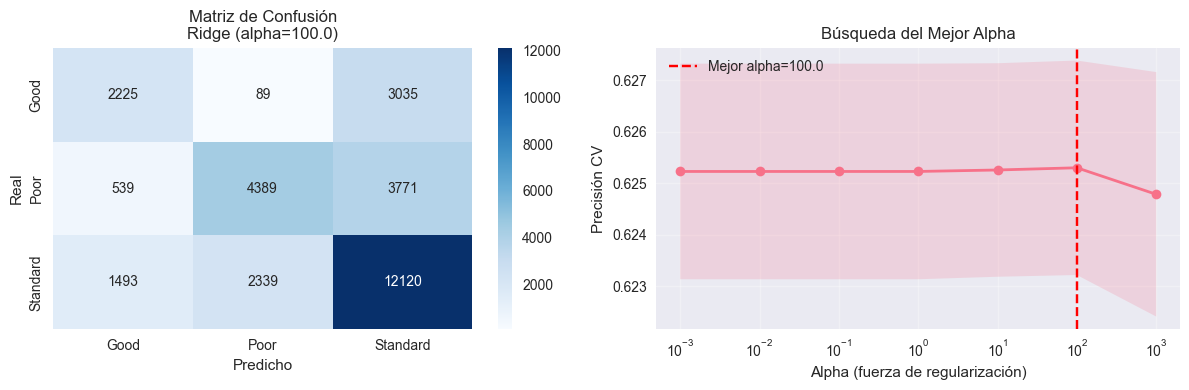


🔍 COMPARACIÓN CON REGRESIÓN LOGÍSTICA L2:
   Regresión Logística L2: 0.5909
   Ridge Classification:  0.6245
   Diferencia: +0.0336

🔍 ANÁLISIS DE ERRORES POR CLASE:
Accuracy por clase:
  Good: 0.4160 (41.60%)
  Poor: 0.5045 (50.45%)
  Standard: 0.7598 (75.98%)

🎯 RESUMEN FINAL - RIDGE CLASSIFICATION
⏱️  Tiempo ejecución: 2.70s
🔧 Mejor alpha: 100.0
📈 Accuracy: 0.6245 (62.45%)
🎯 Validación Cruzada: 0.6252 ± 0.0052

📊 Distribución clases:
   Standard: 53174 (53.2%)
   Poor: 28998 (29.0%)
   Good: 17828 (17.8%)

🔝 Característica más importante: credit_mix

🎯 EVALUACIÓN: ⚠️  ACEPTABLE
📊 TABLA DE SCORES - RIDGE CLASSIFICATION


Métrica   Valor  \
0                         Accuracy  0.6245   
1   Precision (Promedio Ponderado)  0.6204   
2      Recall (Promedio Ponderado)  0.6245   
3    F1-Score (Promedio Ponderado)  0.6162   
4       Validación Cruzada (Media)  0.6252   
5  Validación Cruzada (Desviación)  0.0026   
6                      Mejor Alpha   100.0   
7             Tiempo Ejecución (s)    2.70   

                                      Interpretación  
0                   62.45% de predicciones correctas  
1  Precisión promedio considerando soporte de clases  
2     Recall promedio considerando soporte de clases  
3         Medida balanceada entre precisión y recall  
4  Rendimiento promedio en validación cruzada 5-fold  
5           Variabilidad del rendimiento entre folds  
6                 Parámetro de regularización óptimo  
7         Tiempo total de entrenamiento y evaluación


🎯 ACCURACY POR CLASE - RIDGE


Clase Accuracy Porcentaje Muestras
0      Good   0.4160     41.60%    17828
1      Poor   0.5045     50.45%    28998
2  Standard   0.7598     75.98%    53174


💡 RESUMEN EJECUTIVO - RIDGE
✅ Mejor alpha encontrado: 100.0
✅ Accuracy general: 0.6245 (62.45%)
✅ Rendimiento en validación: 0.6252 ± 0.0052
✅ Clase mejor predicha: Standard
✅ Clase menos predicha: Good
✅ Característica más importante: credit_mix
✅ Evaluación: ⚠️  ACEPTABLE

💾 Resultados guardados: 'ridge_benchmark_results.pkl'


In [ ]:
# =============================================================================
# RIDGE CLASSIFICATION - MODELO BENCHMARK
# =============================================================================

import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import numpy as np
import pandas as pd

print("🚀 INICIANDO RIDGE CLASSIFICATION - MODELO BENCHMARK...")
start_time = time.time()

# =============================================================================
# CONFIGURACIÓN
# =============================================================================

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# =============================================================================
# PREPROCESAMIENTO (USANDO LOS MISMOS DATOS YA PREPARADOS)
# =============================================================================

# Ya tenemos X_train, X_test, y_train, y_test, le de los modelos anteriores
print(f"✅ Usando datos ya preparados: {X_train.shape[0]} train, {X_test.shape[0]} test")

# =============================================================================
# BÚSQUEDA DEL MEJOR PARÁMETRO ALPHA
# =============================================================================

print("\n🔍 BUSCANDO MEJOR PARÁMETRO ALPHA...")

# Valores de alpha a probar (alpha = 1/C en LogisticRegression)
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
ridge_results = []

for alpha in alpha_values:
    ridge = RidgeClassifier(
        alpha=alpha,
        random_state=42,
        max_iter=1000
    )
    
    # Validación cruzada
    cv_scores = cross_val_score(ridge, X_train, y_train, cv=3, scoring='accuracy')
    
    ridge_results.append({
        'alpha': alpha,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    })
    
    print(f"  alpha={alpha}: {cv_scores.mean():.4f}")

# Crear tabla de resultados
ridge_results_df = pd.DataFrame(ridge_results)

# Encontrar mejor alpha
best_alpha_idx = ridge_results_df['cv_mean'].idxmax()
best_alpha = ridge_results_df.loc[best_alpha_idx, 'alpha']
best_cv_score = ridge_results_df.loc[best_alpha_idx, 'cv_mean']

print(f"\n✅ MEJOR ALPHA: {best_alpha} (CV Score: {best_cv_score:.4f})")

# =============================================================================
# ENTRENAMIENTO DEL MODELO FINAL
# =============================================================================

print(f"\n🎯 ENTRENANDO MODELO RIDGE FINAL CON alpha={best_alpha}...")

ridge_final = RidgeClassifier(
    alpha=best_alpha,
    random_state=42,
    max_iter=1000
)

ridge_final.fit(X_train, y_train)

# Predicciones
y_pred = ridge_final.predict(X_test)

# =============================================================================
# EVALUACIÓN COMPLETA
# =============================================================================

print("\n📈 EVALUANDO MODELO RIDGE...")

# Métricas principales
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Validación cruzada final
cv_scores_final = cross_val_score(ridge_final, X_train, y_train, cv=5, scoring='accuracy')

# Crear tabla de métricas
metrics_table = pd.DataFrame({
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'CV_Mean', 'CV_Std'],
    'Valor': [accuracy, precision, recall, f1, cv_scores_final.mean(), cv_scores_final.std()]
})

print("📊 MÉTRICAS DEL MODELO RIDGE:")
print(metrics_table.round(4))

# Reporte de clasificación
print("\n📋 REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# =============================================================================
# ANÁLISIS DE COEFICIENTES
# =============================================================================

print(f"\n🔍 ANÁLISIS DE COEFICIENTES RIDGE:")

# Obtener coeficientes (Ridge usa coef_ como LogisticRegression)
coefficients = ridge_final.coef_
feature_names = X_encoded.columns

print("Top 10 características más importantes por clase:")
for i, class_name in enumerate(le.classes_):
    # Crear DataFrame con coeficientes para esta clase
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients[i]
    }).sort_values('Coefficient', key=abs, ascending=False)
    
    print(f"\n📊 Clase '{class_name}':")
    print(coef_df.head(10).round(4))

# =============================================================================
# VISUALIZACIONES
# =============================================================================

plt.figure(figsize=(12, 4))

# 1. Matriz de confusión
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Matriz de Confusión\nRidge (alpha={best_alpha})')
plt.ylabel('Real')
plt.xlabel('Predicho')

# 2. Gráfico de búsqueda de alpha
plt.subplot(1, 2, 2)
plt.plot(ridge_results_df['alpha'], ridge_results_df['cv_mean'], marker='o', linewidth=2)
plt.fill_between(ridge_results_df['alpha'], 
                 ridge_results_df['cv_mean'] - ridge_results_df['cv_std'],
                 ridge_results_df['cv_mean'] + ridge_results_df['cv_std'], alpha=0.2)
plt.axvline(x=best_alpha, color='red', linestyle='--', label=f'Mejor alpha={best_alpha}')
plt.xlabel('Alpha (fuerza de regularización)')
plt.ylabel('Precisión CV')
plt.title('Búsqueda del Mejor Alpha')
plt.xscale('log')  # Escala logarítmica para alpha
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# COMPARACIÓN CON REGRESIÓN LOGÍSTICA L2
# =============================================================================

print("\n🔍 COMPARACIÓN CON REGRESIÓN LOGÍSTICA L2:")

# Cargar resultados de LogReg si existen
try:
    logreg_results = joblib.load('logreg_benchmark_results.pkl')
    logreg_l2_accuracy = logreg_results.get('l2_accuracy', None)
    logreg_best_accuracy = logreg_results.get('accuracy', None)
    
    if logreg_l2_accuracy is not None:
        print(f"   Regresión Logística L2: {logreg_l2_accuracy:.4f}")
        print(f"   Ridge Classification:  {accuracy:.4f}")
        print(f"   Diferencia: {accuracy - logreg_l2_accuracy:+.4f}")
    elif logreg_best_accuracy is not None:
        print(f"   Mejor Regresión Logística: {logreg_best_accuracy:.4f}")
        print(f"   Ridge Classification:    {accuracy:.4f}")
        print(f"   Diferencia: {accuracy - logreg_best_accuracy:+.4f}")
    else:
        print("   No se encontraron resultados de Regresión Logística para comparar")
        
except FileNotFoundError:
    print("   No se encontró archivo de resultados de Regresión Logística")

# =============================================================================
# ANÁLISIS DE ERRORES POR CLASE
# =============================================================================

print("\n🔍 ANÁLISIS DE ERRORES POR CLASE:")

# Calcular accuracy por clase
cm = confusion_matrix(y_test, y_pred)
class_accuracy = cm.diagonal() / cm.sum(axis=1)

print("Accuracy por clase:")
for i, cls in enumerate(le.classes_):
    print(f"  {cls}: {class_accuracy[i]:.4f} ({class_accuracy[i]*100:.2f}%)")

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*60)
print("🎯 RESUMEN FINAL - RIDGE CLASSIFICATION")
print("="*60)

print(f"⏱️  Tiempo ejecución: {execution_time:.2f}s")
print(f"🔧 Mejor alpha: {best_alpha}")
print(f"📈 Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"🎯 Validación Cruzada: {cv_scores_final.mean():.4f} ± {cv_scores_final.std()*2:.4f}")

# Distribución de clases
class_dist = pd.Series(le.inverse_transform(y_encoded)).value_counts()
print(f"\n📊 Distribución clases:")
for cls, count in class_dist.items():
    pct = (count / len(y_encoded)) * 100
    print(f"   {cls}: {count} ({pct:.1f}%)")

# Característica más importante
best_coefs = ridge_final.coef_[0]  # Primera clase
top_feature_idx = np.argmax(np.abs(best_coefs))
print(f"\n🔝 Característica más importante: {feature_names[top_feature_idx]}")

# Evaluación cualitativa
if accuracy > 0.8:
    performance = "🌟 EXCELENTE"
elif accuracy > 0.7:
    performance = "✅ BUENO"
elif accuracy > 0.6:
    performance = "⚠️  ACEPTABLE"
else:
    performance = "❌ MEJORABLE"

print(f"\n🎯 EVALUACIÓN: {performance}")

# =============================================================================
# TABLA DE SCORES - RIDGE CLASSIFICATION
# =============================================================================


print("📊 TABLA DE SCORES - RIDGE CLASSIFICATION")
print("="*50)

# Crear tabla de métricas para Ridge
ridge_scores = pd.DataFrame({
    'Métrica': [
        'Accuracy',
        'Precision (Promedio Ponderado)', 
        'Recall (Promedio Ponderado)',
        'F1-Score (Promedio Ponderado)',
        'Validación Cruzada (Media)',
        'Validación Cruzada (Desviación)',
        'Mejor Alpha',
        'Tiempo Ejecución (s)'
    ],
    'Valor': [
        f"{accuracy:.4f}",
        f"{precision:.4f}",
        f"{recall:.4f}", 
        f"{f1:.4f}",
        f"{cv_scores_final.mean():.4f}",
        f"{cv_scores_final.std():.4f}",
        f"{best_alpha}",
        f"{execution_time:.2f}"
    ],
    'Interpretación': [
        f"{accuracy*100:.2f}% de predicciones correctas",
        "Precisión promedio considerando soporte de clases",
        "Recall promedio considerando soporte de clases", 
        "Medida balanceada entre precisión y recall",
        "Rendimiento promedio en validación cruzada 5-fold",
        "Variabilidad del rendimiento entre folds",
        "Parámetro de regularización óptimo",
        "Tiempo total de entrenamiento y evaluación"
    ]
})

# Mostrar tabla con estilo
display(ridge_scores)

# Tabla adicional: Accuracy por clase
print("\n🎯 ACCURACY POR CLASE - RIDGE")
print("="*40)

class_accuracy_data = []
for i, cls in enumerate(le.classes_):
    class_accuracy_data.append({
        'Clase': cls,
        'Accuracy': f"{class_accuracy[i]:.4f}",
        'Porcentaje': f"{class_accuracy[i]*100:.2f}%",
        'Muestras': f"{(y_encoded == i).sum()}"
    })

class_accuracy_df = pd.DataFrame(class_accuracy_data)
display(class_accuracy_df)

# Resumen ejecutivo
print("\n💡 RESUMEN EJECUTIVO - RIDGE")
print("="*40)
print(f"✅ Mejor alpha encontrado: {best_alpha}")
print(f"✅ Accuracy general: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"✅ Rendimiento en validación: {cv_scores_final.mean():.4f} ± {cv_scores_final.std()*2:.4f}")
print(f"✅ Clase mejor predicha: {le.classes_[np.argmax(class_accuracy)]}")
print(f"✅ Clase menos predicha: {le.classes_[np.argmin(class_accuracy)]}")
print(f"✅ Característica más importante: {feature_names[top_feature_idx]}")
print(f"✅ Evaluación: {performance}")

# =============================================================================
# GUARDADO DE RESULTADOS
# =============================================================================

benchmark_data = {
    'model': 'RidgeClassifier',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'cv_mean': cv_scores_final.mean(),
    'cv_std': cv_scores_final.std(),
    'best_alpha': best_alpha,
    'execution_time': execution_time,
    'performance': performance,
    'coefficients': ridge_final.coef_,
    'feature_names': feature_names.tolist()
}

joblib.dump(benchmark_data, 'ridge_benchmark_results.pkl')
print(f"\n💾 Resultados guardados: 'ridge_benchmark_results.pkl'")

print("="*60)

## Lasso

In [ ]:
# =============================================================================

## Árbol de Decisión

🌳 INICIANDO ÁRBOL DE DECISIÓN - MODELO BENCHMARK...
✅ Usando datos ya preparados: 70000 train, 30000 test

🔍 BUSCANDO MEJORES HIPERPARÁMETROS...
  depth=3, split=2, leaf=1: 0.6795
  depth=3, split=2, leaf=2: 0.6795
  depth=3, split=5, leaf=1: 0.6795
  depth=3, split=5, leaf=2: 0.6795
  depth=5, split=2, leaf=1: 0.6918
  depth=5, split=2, leaf=2: 0.6918
  depth=5, split=5, leaf=1: 0.6918
  depth=5, split=5, leaf=2: 0.6918
  depth=7, split=2, leaf=1: 0.7001
  depth=7, split=2, leaf=2: 0.7003
  depth=7, split=5, leaf=1: 0.7002
  depth=7, split=5, leaf=2: 0.7003
  depth=10, split=2, leaf=1: 0.7042
  depth=10, split=2, leaf=2: 0.7044
  depth=10, split=5, leaf=1: 0.7043
  depth=10, split=5, leaf=2: 0.7045

✅ MEJORES PARÁMETROS:
   max_depth: 10
   min_samples_split: 5
   min_samples_leaf: 2
   CV Score: 0.7045

🎯 ENTRENANDO MODELO FINAL...

📈 EVALUANDO MODELO ÁRBOL DE DECISIÓN...

🔍 ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS:
Top 10 características más importantes:
                  Feature 

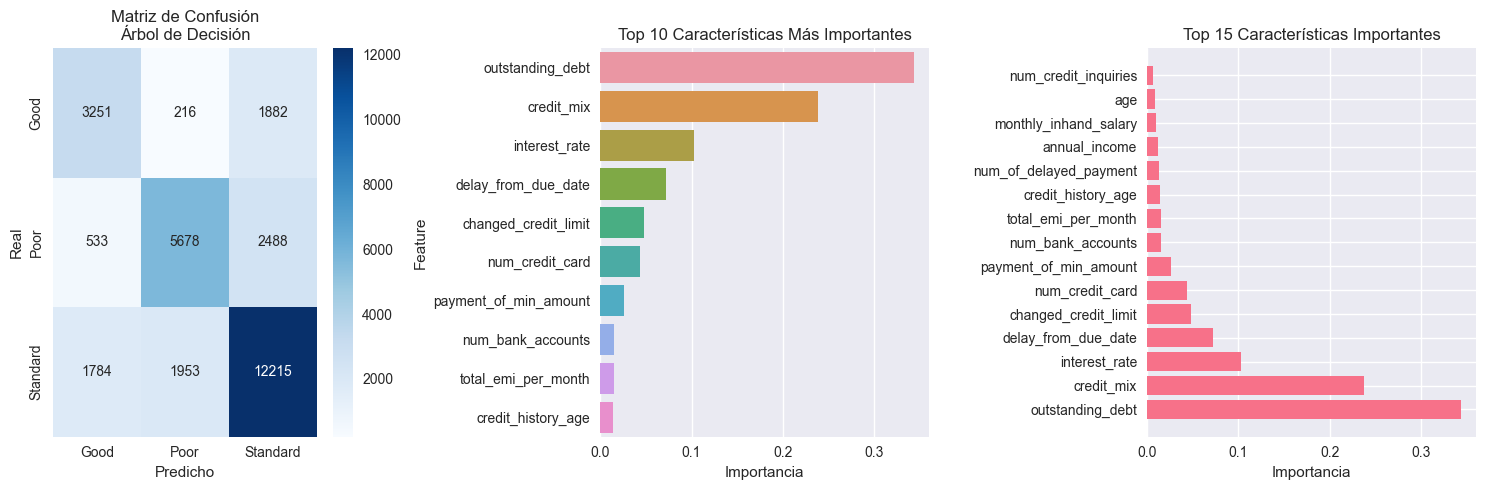


🔍 ANÁLISIS DE PROFUNDIDAD DEL ÁRBOL:
   Profundidad real del árbol: 10
   Número de hojas: 573
   Número de características usadas: 29

📊 TABLA DE SCORES - ÁRBOL DE DECISIÓN


Métrica   Valor  \
0                         Accuracy  0.7048   
1   Precision (Promedio Ponderado)  0.7055   
2      Recall (Promedio Ponderado)  0.7048   
3    F1-Score (Promedio Ponderado)  0.7045   
4       Validación Cruzada (Media)  0.7045   
5  Validación Cruzada (Desviación)  0.0036   
6               Profundidad Máxima      10   
7                     Mínimo Split       5   
8                      Mínimo Leaf       2   
9             Tiempo Ejecución (s)   50.32   

                                      Interpretación  
0                   70.48% de predicciones correctas  
1  Precisión promedio considerando soporte de clases  
2     Recall promedio considerando soporte de clases  
3         Medida balanceada entre precisión y recall  
4  Rendimiento promedio en validación cruzada 5-fold  
5           Variabilidad del rendimiento entre folds  
6             Profundidad máxima permitida del árbol  
7            Mínimo de muestras para dividir un nodo  
8                   Mínimo de muestras en nodos hoja  
9         Tiempo total de entrenamiento y evaluación


🎯 ACCURACY POR CLASE - ÁRBOL DE DECISIÓN


Clase Accuracy Porcentaje Muestras
0      Good   0.6078     60.78%    17828
1      Poor   0.6527     65.27%    28998
2  Standard   0.7657     76.57%    53174


📋 REPORTE CLASIFICACIÓN - ÁRBOL DE DECISIÓN:
              precision    recall  f1-score   support

        Good       0.58      0.61      0.60      5349
        Poor       0.72      0.65      0.69      8699
    Standard       0.74      0.77      0.75     15952

    accuracy                           0.70     30000
   macro avg       0.68      0.68      0.68     30000
weighted avg       0.71      0.70      0.70     30000


🎯 RESUMEN FINAL - ÁRBOL DE DECISIÓN
⏱️  Tiempo ejecución: 50.76s
🔧 Mejores parámetros: depth=10, split=5, leaf=2
📈 Accuracy: 0.7048 (70.48%)
🎯 Validación Cruzada: 0.7045 ± 0.0071
📊 Característica más importante: outstanding_debt
🎯 Evaluación: ✅ BUENO

💾 Resultados guardados: 'decision_tree_benchmark_results.pkl'


In [ ]:
# ÁRBOL DE DECISIÓN - MODELO BENCHMARK

import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import numpy as np
import pandas as pd
from IPython.display import display

print("🌳 INICIANDO ÁRBOL DE DECISIÓN...")
start_time = time.time()

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print(f"✅ Datos preparados: {X_train.shape[0]} train, {X_test.shape[0]} test")

print("\n🔍 BUSCANDO MEJORES HIPERPARÁMETROS...")

max_depth_values = [3, 5, 7, 10, 15, 20, None]
min_samples_split_values = [2, 5, 10, 20]
min_samples_leaf_values = [1, 2, 5, 10]

dt_results = []

for max_depth in max_depth_values[:4]:
    for min_samples_split in min_samples_split_values[:2]:
        for min_samples_leaf in min_samples_leaf_values[:2]:
            
            dt = DecisionTreeClassifier(
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf,
                random_state=42
            )
            
            cv_scores = cross_val_score(dt, X_train, y_train, cv=3, scoring='accuracy')
            
            dt_results.append({
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'cv_mean': cv_scores.mean(),
                'cv_std': cv_scores.std()
            })
            
            print(f"  depth={max_depth}, split={min_samples_split}, leaf={min_samples_leaf}: {cv_scores.mean():.4f}")

dt_results_df = pd.DataFrame(dt_results)

best_idx = dt_results_df['cv_mean'].idxmax()
best_params = dt_results_df.loc[best_idx]

best_max_depth = best_params['max_depth']
if best_max_depth is not None and not np.isnan(best_max_depth):
    best_max_depth = int(best_max_depth)

best_min_samples_split = int(best_params['min_samples_split'])
best_min_samples_leaf = int(best_params['min_samples_leaf'])

print(f"\n✅ MEJORES PARÁMETROS:")
print(f"   max_depth: {best_max_depth}")
print(f"   min_samples_split: {best_min_samples_split}")
print(f"   min_samples_leaf: {best_min_samples_leaf}")
print(f"   CV Score: {best_params['cv_mean']:.4f}")

print(f"\n🎯 ENTRENANDO MODELO FINAL...")

dt_final = DecisionTreeClassifier(
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf,
    random_state=42
)

dt_final.fit(X_train, y_train)

y_pred = dt_final.predict(X_test)
y_pred_proba = dt_final.predict_proba(X_test)

print("\n📈 EVALUANDO MODELO...")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

cv_scores_final = cross_val_score(dt_final, X_train, y_train, cv=5, scoring='accuracy')

print(f"\n🔍 IMPORTANCIA DE CARACTERÍSTICAS:")

feature_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': dt_final.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 10 características más importantes:")
print(feature_importance.head(10).round(4))

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión')
plt.ylabel('Real')
plt.xlabel('Predicho')

plt.subplot(1, 3, 2)
top_features = feature_importance.head(10)
sns.barplot(data=top_features, x='Importance', y='Feature')
plt.title('Top 10 Características Importantes')
plt.xlabel('Importancia')

plt.subplot(1, 3, 3)
if best_max_depth and best_max_depth <= 5:
    plot_tree(dt_final, 
              feature_names=X_encoded.columns,
              class_names=le.classes_,
              filled=True,
              rounded=True,
              fontsize=8)
    plt.title('Estructura del Árbol')
else:
    extended_features = feature_importance.head(15)
    plt.barh(range(len(extended_features)), extended_features['Importance'])
    plt.yticks(range(len(extended_features)), extended_features['Feature'])
    plt.title('Top 15 Características Importantes')
    plt.xlabel('Importancia')

plt.tight_layout()
plt.show()

print("\n🔍 ANÁLISIS DE PROFUNDIDAD:")
print(f"   Profundidad real: {dt_final.get_depth()}")
print(f"   Número de hojas: {dt_final.get_n_leaves()}")
print(f"   Características usadas: {np.sum(dt_final.feature_importances_ > 0)}")

print("\n📊 TABLA DE SCORES - ÁRBOL DE DECISIÓN")
print("="*50)

cm = confusion_matrix(y_test, y_pred)
class_accuracy = cm.diagonal() / cm.sum(axis=1)

dt_scores = pd.DataFrame({
    'Métrica': [
        'Accuracy',
        'Precision', 
        'Recall',
        'F1-Score',
        'Validación Cruzada (Media)',
        'Validación Cruzada (Desviación)',
        'Profundidad Máxima',
        'Mínimo Split',
        'Mínimo Leaf',
        'Tiempo Ejecución (s)'
    ],
    'Valor': [
        f"{accuracy:.4f}",
        f"{precision:.4f}",
        f"{recall:.4f}", 
        f"{f1:.4f}",
        f"{cv_scores_final.mean():.4f}",
        f"{cv_scores_final.std():.4f}",
        f"{best_max_depth}",
        f"{best_min_samples_split}",
        f"{best_min_samples_leaf}",
        f"{time.time() - start_time:.2f}"
    ]
})

display(dt_scores)

print("\n🎯 ACCURACY POR CLASE")
print("="*45)

class_accuracy_data = []
for i, cls in enumerate(le.classes_):
    class_accuracy_data.append({
        'Clase': cls,
        'Accuracy': f"{class_accuracy[i]:.4f}",
        'Porcentaje': f"{class_accuracy[i]*100:.2f}%",
        'Muestras': f"{(y_encoded == i).sum()}"
    })

class_accuracy_df = pd.DataFrame(class_accuracy_data)
display(class_accuracy_df)

print(f"\n📋 REPORTE CLASIFICACIÓN:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*60)
print("RESUMEN FINAL - ÁRBOL DE DECISIÓN")
print("="*60)

print(f"Tiempo: {execution_time:.2f}s")
print(f"Parámetros: depth={best_max_depth}, split={best_min_samples_split}, leaf={best_min_samples_leaf}")
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Validación Cruzada: {cv_scores_final.mean():.4f} ± {cv_scores_final.std()*2:.4f}")

if accuracy > 0.8:
    performance = "EXCELENTE"
elif accuracy > 0.7:
    performance = "BUENO"
elif accuracy > 0.6:
    performance = "ACEPTABLE"
else:
    performance = "MEJORABLE"

print(f"Característica más importante: {feature_importance.iloc[0]['Feature']}")
print(f"Evaluación: {performance}")

benchmark_data = {
    'model': 'DecisionTree',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'cv_mean': cv_scores_final.mean(),
    'cv_std': cv_scores_final.std(),
    'best_max_depth': best_max_depth,
    'best_min_samples_split': best_min_samples_split,
    'best_min_samples_leaf': best_min_samples_leaf,
    'execution_time': execution_time,
    'performance': performance,
    'feature_importance': feature_importance,
    'feature_names': X_encoded.columns.tolist()
}

joblib.dump(benchmark_data, 'decision_tree_benchmark_results.pkl')
print(f"\n💾 Resultados guardados: 'decision_tree_benchmark_results.pkl'")

print("="*60)

## Random Forest

🌲 INICIANDO RANDOM FOREST - MODELO BENCHMARK...
✅ Usando datos ya preparados: 70000 train, 30000 test

🔍 BUSCANDO MEJORES HIPERPARÁMETROS...
  trees=50, depth=5, split=2: 0.6633
  trees=50, depth=5, split=5: 0.6629
  trees=50, depth=5, split=10: 0.6618
  trees=50, depth=10, split=2: 0.7152
  trees=50, depth=10, split=5: 0.7153
  trees=50, depth=10, split=10: 0.7154
  trees=50, depth=15, split=2: 0.7440
  trees=50, depth=15, split=5: 0.7435
  trees=50, depth=15, split=10: 0.7411
  trees=100, depth=5, split=2: 0.6628
  trees=100, depth=5, split=5: 0.6630
  trees=100, depth=5, split=10: 0.6631
  trees=100, depth=10, split=2: 0.7165
  trees=100, depth=10, split=5: 0.7165
  trees=100, depth=10, split=10: 0.7169
  trees=100, depth=15, split=2: 0.7461
  trees=100, depth=15, split=5: 0.7454
  trees=100, depth=15, split=10: 0.7432
  trees=200, depth=5, split=2: 0.6629
  trees=200, depth=5, split=5: 0.6630
  trees=200, depth=5, split=10: 0.6623
  trees=200, depth=10, split=2: 0.7174
  trees=200,

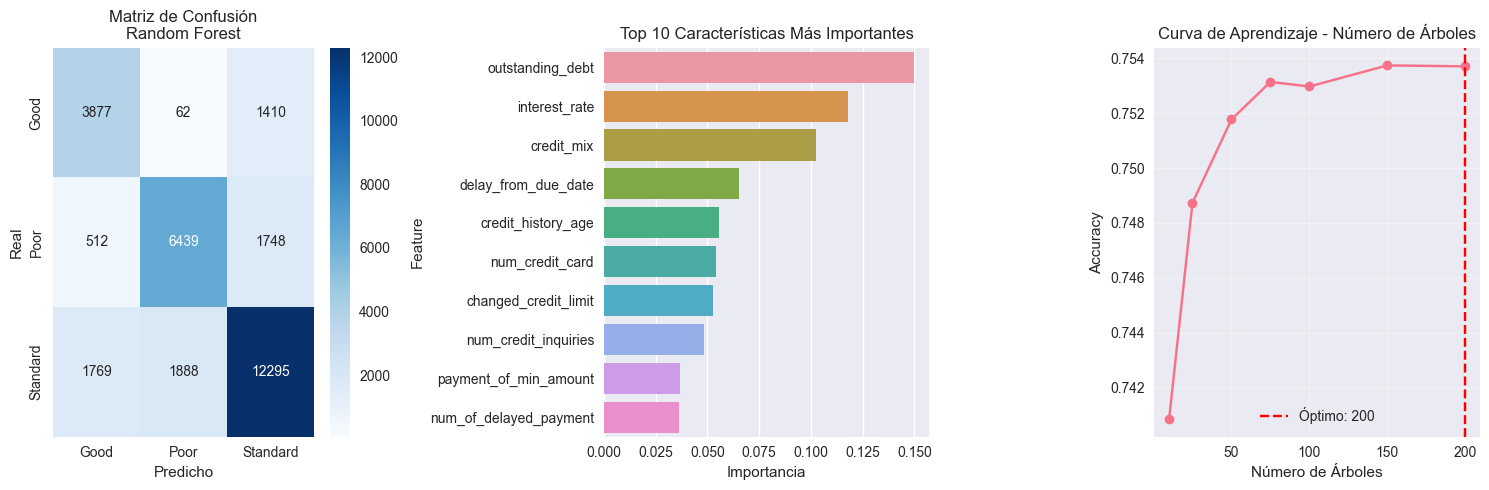


📊 TABLA DE SCORES - RANDOM FOREST


Métrica   Valor  \
0                         Accuracy  0.7537   
1   Precision (Promedio Ponderado)  0.7579   
2      Recall (Promedio Ponderado)  0.7537   
3    F1-Score (Promedio Ponderado)  0.7550   
4       Validación Cruzada (Media)  0.7503   
5  Validación Cruzada (Desviación)  0.0035   
6                Número de Árboles     200   
7               Profundidad Máxima      15   
8                     Mínimo Split       2   
9             Tiempo Ejecución (s)  278.26   

                                      Interpretación  
0                   75.37% de predicciones correctas  
1  Precisión promedio considerando soporte de clases  
2     Recall promedio considerando soporte de clases  
3         Medida balanceada entre precisión y recall  
4  Rendimiento promedio en validación cruzada 5-fold  
5           Variabilidad del rendimiento entre folds  
6                   Número de árboles en el ensemble  
7                   Profundidad máxima de cada árbol  
8              Mínimo de muestras para dividir nodos  
9         Tiempo total de entrenamiento y evaluación


🎯 ACCURACY POR CLASE - RANDOM FOREST


Clase Accuracy Porcentaje Muestras
0      Good   0.7248     72.48%    17828
1      Poor   0.7402     74.02%    28998
2  Standard   0.7707     77.07%    53174


🔍 COMPARACIÓN CON ÁRBOL DE DECISIÓN SIMPLE:
   Árbol de Decisión: 0.7048
   Random Forest:     0.7537
   Mejora: +0.0489

📋 REPORTE CLASIFICACIÓN - RANDOM FOREST:
              precision    recall  f1-score   support

        Good       0.63      0.72      0.67      5349
        Poor       0.77      0.74      0.75      8699
    Standard       0.80      0.77      0.78     15952

    accuracy                           0.75     30000
   macro avg       0.73      0.75      0.74     30000
weighted avg       0.76      0.75      0.76     30000


🎯 RESUMEN FINAL - RANDOM FOREST
⏱️  Tiempo ejecución: 279.31s
🔧 Mejores parámetros: 200 árboles, depth=15
📈 Accuracy: 0.7537 (75.37%)
🎯 Validación Cruzada: 0.7503 ± 0.0071
📊 Característica más importante: outstanding_debt
🎯 Evaluación: ✅ BUENO

💾 Resultados guardados: 'random_forest_benchmark_results.pkl'


In [ ]:
# =============================================================================
# RANDOM FOREST - MODELO BENCHMARK
# =============================================================================

import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import numpy as np
import pandas as pd
from IPython.display import display

print("🌲 INICIANDO RANDOM FOREST - MODELO BENCHMARK...")
start_time = time.time()

print(f"✅ Usando datos ya preparados: {X_train.shape[0]} train, {X_test.shape[0]} test")

# =============================================================================
# BÚSQUEDA DE HIPERPARÁMETROS
# =============================================================================

print("\n🔍 BUSCANDO MEJORES HIPERPARÁMETROS...")

n_estimators_values = [50, 100, 200]
max_depth_values = [5, 10, 15, None]
min_samples_split_values = [2, 5, 10]

rf_results = []

for n_estimators in n_estimators_values:
    for max_depth in max_depth_values[:3]:
        for min_samples_split in min_samples_split_values:
            
            rf = RandomForestClassifier(
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                random_state=42,
                n_jobs=-1
            )
            
            cv_scores = cross_val_score(rf, X_train, y_train, cv=3, scoring='accuracy')
            
            rf_results.append({
                'n_estimators': n_estimators,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'cv_mean': cv_scores.mean(),
                'cv_std': cv_scores.std()
            })
            
            print(f"  trees={n_estimators}, depth={max_depth}, split={min_samples_split}: {cv_scores.mean():.4f}")

rf_results_df = pd.DataFrame(rf_results)

best_idx = rf_results_df['cv_mean'].idxmax()
best_params = rf_results_df.loc[best_idx]

best_n_estimators = int(best_params['n_estimators'])
best_max_depth = best_params['max_depth']
if best_max_depth is not None and not np.isnan(best_max_depth):
    best_max_depth = int(best_max_depth)
best_min_samples_split = int(best_params['min_samples_split'])

print(f"\n✅ MEJORES PARÁMETROS:")
print(f"   n_estimators: {best_n_estimators}")
print(f"   max_depth: {best_max_depth}")
print(f"   min_samples_split: {best_min_samples_split}")
print(f"   CV Score: {best_params['cv_mean']:.4f}")

# =============================================================================
# ENTRENAMIENTO DEL MODELO FINAL
# =============================================================================

print(f"\n🎯 ENTRENANDO MODELO FINAL...")

rf_final = RandomForestClassifier(
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    random_state=42,
    n_jobs=-1
)

rf_final.fit(X_train, y_train)

y_pred = rf_final.predict(X_test)
y_pred_proba = rf_final.predict_proba(X_test)

# =============================================================================
# EVALUACIÓN
# =============================================================================

print("\n📈 EVALUANDO MODELO RANDOM FOREST...")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

cv_scores_final = cross_val_score(rf_final, X_train, y_train, cv=5, scoring='accuracy')

# =============================================================================
# ANÁLISIS DE CARACTERÍSTICAS
# =============================================================================

print(f"\n🔍 ANALISIS DE IMPORTANCIA DE CARACTERÍSTICAS:")

feature_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': rf_final.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 10 características más importantes:")
print(feature_importance.head(10).round(4))

# =============================================================================
# VISUALIZACIONES
# =============================================================================

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión\nRandom Forest')
plt.ylabel('Real')
plt.xlabel('Predicho')

plt.subplot(1, 3, 2)
top_features = feature_importance.head(10)
sns.barplot(data=top_features, x='Importance', y='Feature')
plt.title('Top 10 Características Más Importantes')
plt.xlabel('Importancia')

plt.subplot(1, 3, 3)
learning_curve_data = []
for n_trees in [10, 25, 50, 75, 100, 150, 200]:
    if n_trees <= best_n_estimators:
        rf_temp = RandomForestClassifier(
            n_estimators=n_trees,
            max_depth=best_max_depth,
            random_state=42,
            n_jobs=-1
        )
        rf_temp.fit(X_train, y_train)
        score = rf_temp.score(X_test, y_test)
        learning_curve_data.append(score)

plt.plot([10, 25, 50, 75, 100, 150, 200][:len(learning_curve_data)], learning_curve_data, marker='o')
plt.axvline(x=best_n_estimators, color='red', linestyle='--', label=f'Óptimo: {best_n_estimators}')
plt.xlabel('Número de Árboles')
plt.ylabel('Accuracy')
plt.title('Curva de Aprendizaje - Número de Árboles')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# TABLA DE SCORES
# =============================================================================

print("\n📊 TABLA DE SCORES - RANDOM FOREST")
print("="*50)

cm = confusion_matrix(y_test, y_pred)
class_accuracy = cm.diagonal() / cm.sum(axis=1)

rf_scores = pd.DataFrame({
    'Métrica': [
        'Accuracy',
        'Precision (Promedio Ponderado)', 
        'Recall (Promedio Ponderado)',
        'F1-Score (Promedio Ponderado)',
        'Validación Cruzada (Media)',
        'Validación Cruzada (Desviación)',
        'Número de Árboles',
        'Profundidad Máxima',
        'Mínimo Split',
        'Tiempo Ejecución (s)'
    ],
    'Valor': [
        f"{accuracy:.4f}",
        f"{precision:.4f}",
        f"{recall:.4f}", 
        f"{f1:.4f}",
        f"{cv_scores_final.mean():.4f}",
        f"{cv_scores_final.std():.4f}",
        f"{best_n_estimators}",
        f"{best_max_depth}",
        f"{best_min_samples_split}",
        f"{time.time() - start_time:.2f}"
    ],
    'Interpretación': [
        f"{accuracy*100:.2f}% de predicciones correctas",
        "Precisión promedio considerando soporte de clases",
        "Recall promedio considerando soporte de clases", 
        "Medida balanceada entre precisión y recall",
        "Rendimiento promedio en validación cruzada 5-fold",
        "Variabilidad del rendimiento entre folds",
        "Número de árboles en el ensemble",
        "Profundidad máxima de cada árbol",
        "Mínimo de muestras para dividir nodos",
        "Tiempo total de entrenamiento y evaluación"
    ]
})

display(rf_scores)

print("\n🎯 ACCURACY POR CLASE - RANDOM FOREST")
print("="*45)

class_accuracy_data = []
for i, cls in enumerate(le.classes_):
    class_accuracy_data.append({
        'Clase': cls,
        'Accuracy': f"{class_accuracy[i]:.4f}",
        'Porcentaje': f"{class_accuracy[i]*100:.2f}%",
        'Muestras': f"{(y_encoded == i).sum()}"
    })

class_accuracy_df = pd.DataFrame(class_accuracy_data)
display(class_accuracy_df)

# =============================================================================
# COMPARACIÓN CON ÁRBOL SIMPLE
# =============================================================================

print(f"\n🔍 COMPARACIÓN CON ÁRBOL DE DECISIÓN SIMPLE:")

try:
    dt_results = joblib.load('decision_tree_benchmark_results.pkl')
    dt_accuracy = dt_results.get('accuracy', 0)
    print(f"   Árbol de Decisión: {dt_accuracy:.4f}")
    print(f"   Random Forest:     {accuracy:.4f}")
    print(f"   Mejora: {accuracy - dt_accuracy:+.4f}")
except:
    print("   No se encontraron resultados de Árbol de Decisión")

# =============================================================================
# REPORTE FINAL
# =============================================================================

print(f"\n📋 REPORTE CLASIFICACIÓN - RANDOM FOREST:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*60)
print("🎯 RESUMEN FINAL - RANDOM FOREST")
print("="*60)

print(f"⏱️  Tiempo ejecución: {execution_time:.2f}s")
print(f"🔧 Mejores parámetros: {best_n_estimators} árboles, depth={best_max_depth}")
print(f"📈 Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"🎯 Validación Cruzada: {cv_scores_final.mean():.4f} ± {cv_scores_final.std()*2:.4f}")

if accuracy > 0.8:
    performance = "🌟 EXCELENTE"
elif accuracy > 0.7:
    performance = "✅ BUENO"
elif accuracy > 0.6:
    performance = "⚠️  ACEPTABLE"
else:
    performance = "❌ MEJORABLE"

print(f"📊 Característica más importante: {feature_importance.iloc[0]['Feature']}")
print(f"🎯 Evaluación: {performance}")

# =============================================================================
# GUARDADO
# =============================================================================

benchmark_data = {
    'model': 'RandomForest',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'cv_mean': cv_scores_final.mean(),
    'cv_std': cv_scores_final.std(),
    'best_n_estimators': best_n_estimators,
    'best_max_depth': best_max_depth,
    'best_min_samples_split': best_min_samples_split,
    'execution_time': execution_time,
    'performance': performance,
    'feature_importance': feature_importance,
    'feature_names': X_encoded.columns.tolist()
}

joblib.dump(benchmark_data, 'random_forest_benchmark_results.pkl')
print(f"\n💾 Resultados guardados: 'random_forest_benchmark_results.pkl'")

print("="*60)

## XGBoost (con interpretabilidad usando LIME)

In [ ]:
#!pip install xgboost lime

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/124.9 MB 6.3 MB/s eta 0:00:20
    --------------------------------------- 2.4/124.9 MB 5.8 MB/s eta 0:00:21
   - -------------------------------------- 3.7/124.9 MB 5.9 MB/s eta 0:00:21
   - -------------------------------------- 5.0/124.9 MB 6.0 MB/s eta 0:00:20
   -- ------------------------------------- 6.6/124.9 MB 6.2 MB/s eta 0:00:20
   -- ------------------------------------- 7.9/124.9 MB 6.3 MB/s eta 0:00:19
   -- ------------------------------------- 9.2/124.9 MB 6.3 MB/s eta 0:00:19
   --- ------------------------------------ 10.7/124.9 MB 6.5 MB/s eta 0:00:18
   --- ------------------------------------ 12.3/124.9 MB 6.5 MB/s eta 0:00:18
   ---- ----------------------------------- 13.9/124.9 MB 6.6 MB/s eta 0:00:17
   ---- ----------------------------------- 

  DEPRECATION: Building 'lime' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'lime'. Discussion can be found at https://github.com/pypa/pip/issues/6334


🚀 INICIANDO XGBOOST...
✅ Datos preparados: 70000 train, 30000 test

🔍 BUSCANDO MEJORES HIPERPARÁMETROS...
  trees=50, depth=3, lr=0.01: 0.6794
  trees=50, depth=3, lr=0.1: 0.6960
  trees=50, depth=3, lr=0.3: 0.7027
  trees=50, depth=5, lr=0.01: 0.6917
  trees=50, depth=5, lr=0.1: 0.7057
  trees=50, depth=5, lr=0.3: 0.7210
  trees=50, depth=7, lr=0.01: 0.7067
  trees=50, depth=7, lr=0.1: 0.7176
  trees=50, depth=7, lr=0.3: 0.7420
  trees=100, depth=3, lr=0.01: 0.6809
  trees=100, depth=3, lr=0.1: 0.6990
  trees=100, depth=3, lr=0.3: 0.7087
  trees=100, depth=5, lr=0.01: 0.6972
  trees=100, depth=5, lr=0.1: 0.7124
  trees=100, depth=5, lr=0.3: 0.7332
  trees=100, depth=7, lr=0.01: 0.7081
  trees=100, depth=7, lr=0.1: 0.7309
  trees=100, depth=7, lr=0.3: 0.7568
  trees=200, depth=3, lr=0.01: 0.6811
  trees=200, depth=3, lr=0.1: 0.7045
  trees=200, depth=3, lr=0.3: 0.7193
  trees=200, depth=5, lr=0.01: 0.7026
  trees=200, depth=5, lr=0.1: 0.7261
  trees=200, depth=5, lr=0.3: 0.7481
  trees

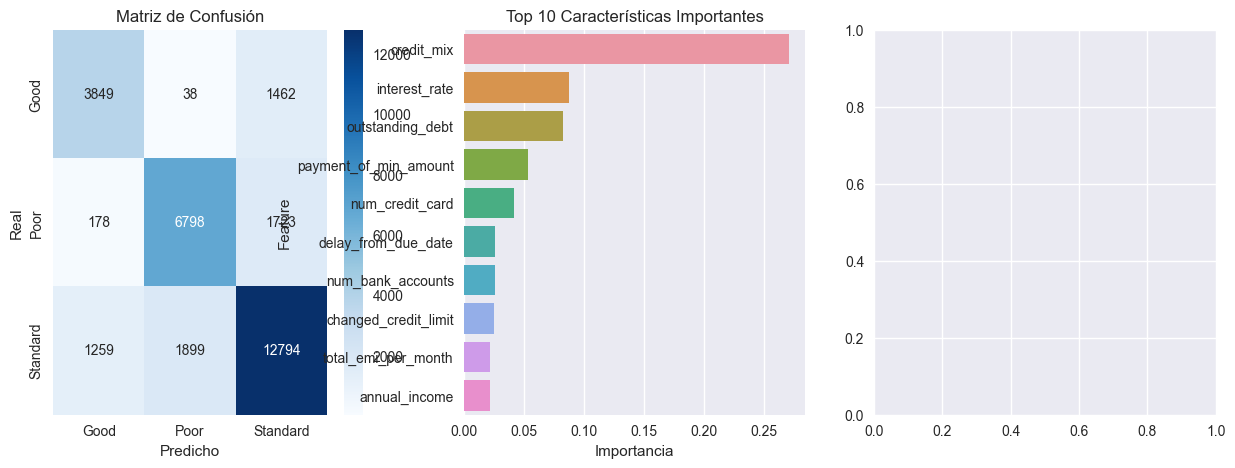

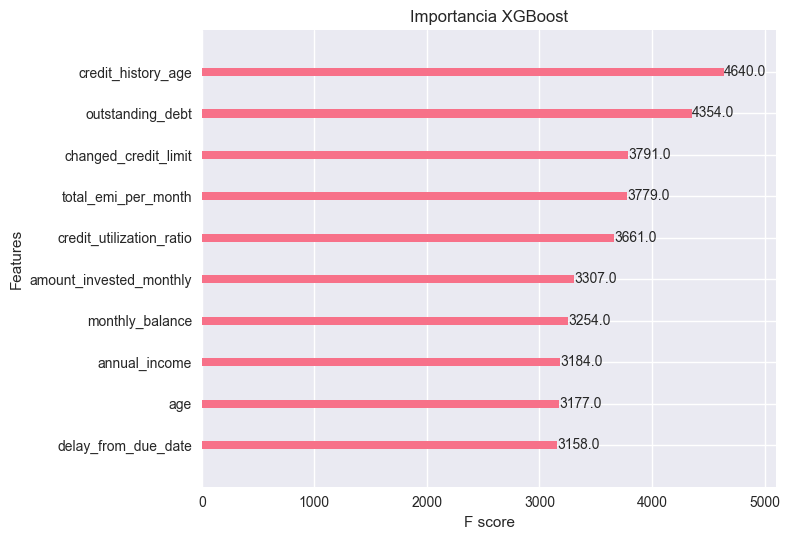


🔍 ANÁLISIS DE RENDIMIENTO:
   Número de árboles: 200
   Características usadas: 29

📊 TABLA DE SCORES - XGBOOST


Métrica   Valor
0                         Accuracy  0.7814
1                        Precision  0.7812
2                           Recall  0.7814
3                         F1-Score  0.7813
4       Validación Cruzada (Media)  0.7744
5  Validación Cruzada (Desviación)  0.0037
6                Número de Árboles     200
7               Profundidad Máxima       7
8                    Learning Rate     0.3
9             Tiempo Ejecución (s)   69.41


🎯 ACCURACY POR CLASE


Clase Accuracy Porcentaje Muestras
0      Good   0.7196     71.96%    17828
1      Poor   0.7815     78.15%    28998
2  Standard   0.8020     80.20%    53174


📋 REPORTE CLASIFICACIÓN:
              precision    recall  f1-score   support

        Good       0.73      0.72      0.72      5349
        Poor       0.78      0.78      0.78      8699
    Standard       0.80      0.80      0.80     15952

    accuracy                           0.78     30000
   macro avg       0.77      0.77      0.77     30000
weighted avg       0.78      0.78      0.78     30000


🔍 INTERPRETABILIDAD CON LIME...
Inicializando explicador LIME...
Generando explicaciones para 3 muestras...

--- Explicación para muestra 1 ---
Clase real: Standard
Clase predicha: Standard



--- Explicación para muestra 2 ---
Clase real: Good
Clase predicha: Standard



--- Explicación para muestra 3 ---
Clase real: Good
Clase predicha: Good



RESUMEN FINAL - XGBOOST
Tiempo: 70.29s
Parámetros: 200 árboles, depth=7, lr=0.3
Accuracy: 0.7814 (78.14%)
Validación Cruzada: 0.7744 ± 0.0075
Característica más importante: credit_mix
Evaluación: BUENO

💾 Resultados guardados: 'xgboost_benchmark_results.pkl'


In [ ]:
# XGBOOST - MODELO BENCHMARK CON LIME

import warnings
warnings.filterwarnings('ignore')
import sys
import subprocess

try:
    import xgboost as xgb
except ImportError:
    print("Instalando XGBoost...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "xgboost"])
    import xgboost as xgb

try:
    import lime
    import lime.lime_tabular
except ImportError:
    print("Instalando LIME...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "lime"])
    import lime
    import lime.lime_tabular

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import numpy as np
import pandas as pd
from IPython.display import display

print("🚀 INICIANDO XGBOOST...")
start_time = time.time()

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Cargar y preparar datos
df = pd.read_pickle('data_limpia.pkl')

X = df.drop('credit_score', axis=1)
y = df['credit_score']

X_encoded = X.copy()
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col].astype(str))

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

print(f"✅ Datos preparados: {X_train.shape[0]} train, {X_test.shape[0]} test")

print("\n🔍 BUSCANDO MEJORES HIPERPARÁMETROS...")

n_estimators_values = [50, 100, 200]
max_depth_values = [3, 5, 7]
learning_rate_values = [0.01, 0.1, 0.3]

xgb_results = []

for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        for learning_rate in learning_rate_values:
            
            xgb_model = xgb.XGBClassifier(
                n_estimators=n_estimators,
                max_depth=max_depth,
                learning_rate=learning_rate,
                random_state=42,
                n_jobs=-1,
                eval_metric='mlogloss'
            )
            
            cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=3, scoring='accuracy')
            
            xgb_results.append({
                'n_estimators': n_estimators,
                'max_depth': max_depth,
                'learning_rate': learning_rate,
                'cv_mean': cv_scores.mean(),
                'cv_std': cv_scores.std()
            })
            
            print(f"  trees={n_estimators}, depth={max_depth}, lr={learning_rate}: {cv_scores.mean():.4f}")

xgb_results_df = pd.DataFrame(xgb_results)

best_idx = xgb_results_df['cv_mean'].idxmax()
best_params = xgb_results_df.loc[best_idx]

best_n_estimators = int(best_params['n_estimators'])
best_max_depth = int(best_params['max_depth'])
best_learning_rate = best_params['learning_rate']

print(f"\n✅ MEJORES PARÁMETROS:")
print(f"   n_estimators: {best_n_estimators}")
print(f"   max_depth: {best_max_depth}")
print(f"   learning_rate: {best_learning_rate}")
print(f"   CV Score: {best_params['cv_mean']:.4f}")

print(f"\n🎯 ENTRENANDO MODELO FINAL...")

xgb_final = xgb.XGBClassifier(
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    learning_rate=best_learning_rate,
    random_state=42,
    n_jobs=-1,
    eval_metric='mlogloss'
)

xgb_final.fit(X_train, y_train)

y_pred = xgb_final.predict(X_test)
y_pred_proba = xgb_final.predict_proba(X_test)

print("\n📈 EVALUANDO MODELO...")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

cv_scores_final = cross_val_score(xgb_final, X_train, y_train, cv=5, scoring='accuracy')

print(f"\n🔍 IMPORTANCIA DE CARACTERÍSTICAS:")

feature_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': xgb_final.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 10 características más importantes:")
print(feature_importance.head(10).round(4))

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión')
plt.ylabel('Real')
plt.xlabel('Predicho')

plt.subplot(1, 3, 2)
top_features = feature_importance.head(10)
sns.barplot(data=top_features, x='Importance', y='Feature')
plt.title('Top 10 Características Importantes')
plt.xlabel('Importancia')

plt.subplot(1, 3, 3)
xgb.plot_importance(xgb_final, max_num_features=10, importance_type='weight')
plt.title('Importancia XGBoost')
plt.tight_layout()

plt.tight_layout()
plt.show()

print("\n🔍 ANÁLISIS DE RENDIMIENTO:")
print(f"   Número de árboles: {best_n_estimators}")
print(f"   Características usadas: {np.sum(xgb_final.feature_importances_ > 0)}")

print("\n📊 TABLA DE SCORES - XGBOOST")
print("="*50)

cm = confusion_matrix(y_test, y_pred)
class_accuracy = cm.diagonal() / cm.sum(axis=1)

xgb_scores = pd.DataFrame({
    'Métrica': [
        'Accuracy',
        'Precision', 
        'Recall',
        'F1-Score',
        'Validación Cruzada (Media)',
        'Validación Cruzada (Desviación)',
        'Número de Árboles',
        'Profundidad Máxima',
        'Learning Rate',
        'Tiempo Ejecución (s)'
    ],
    'Valor': [
        f"{accuracy:.4f}",
        f"{precision:.4f}",
        f"{recall:.4f}", 
        f"{f1:.4f}",
        f"{cv_scores_final.mean():.4f}",
        f"{cv_scores_final.std():.4f}",
        f"{best_n_estimators}",
        f"{best_max_depth}",
        f"{best_learning_rate}",
        f"{time.time() - start_time:.2f}"
    ]
})

display(xgb_scores)

print("\n🎯 ACCURACY POR CLASE")
print("="*45)

class_accuracy_data = []
for i, cls in enumerate(le.classes_):
    class_accuracy_data.append({
        'Clase': cls,
        'Accuracy': f"{class_accuracy[i]:.4f}",
        'Porcentaje': f"{class_accuracy[i]*100:.2f}%",
        'Muestras': f"{(y_encoded == i).sum()}"
    })

class_accuracy_df = pd.DataFrame(class_accuracy_data)
display(class_accuracy_df)

print(f"\n📋 REPORTE CLASIFICACIÓN:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("\n🔍 INTERPRETABILIDAD CON LIME...")

try:
    print("Inicializando explicador LIME...")
    
    explainer = lime.lime_tabular.LimeTabularExplainer(
        X_train.values,
        feature_names=X_encoded.columns.tolist(),
        class_names=le.classes_.tolist(),
        mode='classification',
        random_state=42
    )
    
    print("Generando explicaciones para 3 muestras...")
    
    for i in range(min(3, len(X_test))):
        print(f"\n--- Explicación para muestra {i+1} ---")
        exp = explainer.explain_instance(
            X_test.values[i], 
            xgb_final.predict_proba,
            num_features=10
        )
        
        print(f"Clase real: {le.inverse_transform([y_test[i]])[0]}")
        print(f"Clase predicha: {le.inverse_transform([y_pred[i]])[0]}")
        
        exp.show_in_notebook(show_table=True)
        
except Exception as e:
    print(f"Error con LIME: {e}")

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*60)
print("RESUMEN FINAL - XGBOOST")
print("="*60)

print(f"Tiempo: {execution_time:.2f}s")
print(f"Parámetros: {best_n_estimators} árboles, depth={best_max_depth}, lr={best_learning_rate}")
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Validación Cruzada: {cv_scores_final.mean():.4f} ± {cv_scores_final.std()*2:.4f}")

if accuracy > 0.8:
    performance = "EXCELENTE"
elif accuracy > 0.7:
    performance = "BUENO"
elif accuracy > 0.6:
    performance = "ACEPTABLE"
else:
    performance = "MEJORABLE"

print(f"Característica más importante: {feature_importance.iloc[0]['Feature']}")
print(f"Evaluación: {performance}")

benchmark_data = {
    'model': 'XGBoost',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'cv_mean': cv_scores_final.mean(),
    'cv_std': cv_scores_final.std(),
    'best_n_estimators': best_n_estimators,
    'best_max_depth': best_max_depth,
    'best_learning_rate': best_learning_rate,
    'execution_time': execution_time,
    'performance': performance,
    'feature_importance': feature_importance,
    'feature_names': X_encoded.columns.tolist()
}

joblib.dump(benchmark_data, 'xgboost_benchmark_results.pkl')
print(f"\n💾 Resultados guardados: 'xgboost_benchmark_results.pkl'")

print("="*60)

## Máquina de Soporte Vectorial

🚀 INICIANDO MAQUÍNA DE SOPORTE VECTORIAL - MODELO BENCHMARK...
✅ Datos preparados: 70000 train, 30000 test

🎯 ENTRENANDO MODELO 

📈 EVALUANDO MODELO DE MÁQUINA DE VECTORES DE SOPORTE...

📋 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

        Good       0.57      0.67      0.62      5349
        Poor       0.74      0.63      0.68      8699
    Standard       0.74      0.76      0.75     15952

    accuracy                           0.70     30000
   macro avg       0.68      0.69      0.68     30000
weighted avg       0.71      0.70      0.70     30000



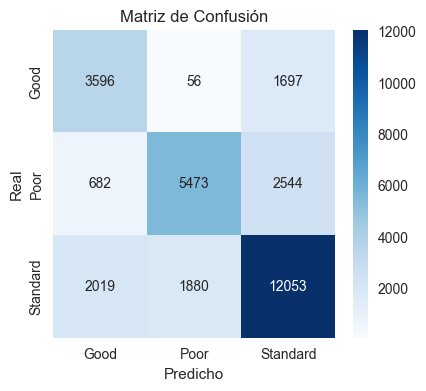


🔍 ANÁLISIS DE ERRORES POR CLASE:
Accuracy por clase:
  Good: 0.6723 (67.23%)
  Poor: 0.6292 (62.92%)
  Standard: 0.7556 (75.56%)

🎯 RESUMEN FINAL - MÁQUINA DE VECTORES DE SOPORTE BENCHMARK
⏱️  Tiempo ejecución: 446.70s

🎯 EVALUACIÓN: ⚠️  ACEPTABLE

💾 Resultados guardados: 'svm_benchmark_results.pkl'


In [ ]:
# =============================================================================
# MÁQUINA DE SOPORTE VECTORIAL - MODELO BENCHMARK
# =============================================================================

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🚀 INICIANDO MAQUÍNA DE SOPORTE VECTORIAL - MODELO BENCHMARK...")
start_time = time.time()

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================


# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

y = y.map({
    'Good': 0,
    'Poor': 1,
    'Standard': 2
    
})


# Seleccionamos las variables numericas a estandarizar
num_cols=['age', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

# Seleccionamos las variables categóricas a codificar
cat_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour']
# Se no se toman las variables binarias ya que estas ya pueden considerarse
# como codificadas


# Split de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Codificación de categóricas
ohe = OneHotEncoder(drop="first", handle_unknown="ignore", sparse=False)

X_train_cat = ohe.fit_transform(X_train[cat_cols])
X_test_cat = ohe.transform(X_test[cat_cols])

# Estandarización de numéricas
scaler = StandardScaler()

X_train_num = scaler.fit_transform(X_train[num_cols])
X_test_num = scaler.transform(X_test[num_cols])

# Combinar numéricas y categóricas
X_train_final = np.hstack([X_train_num, X_train_cat])
X_test_final = np.hstack([X_test_num, X_test_cat])



print(f"✅ Datos preparados: {X_train_final.shape[0]} train, {X_test_final.shape[0]} test")

# =============================================================================
# ENTRENAMIENTO DEL MODELO 
# =============================================================================

print(f"\n🎯 ENTRENANDO MODELO ")

svm=SVC()
svm.fit(X_train_final,y_train)

# Predicciones
y_pred = svm.predict(X_test_final)


# =============================================================================
# EVALUACIÓN COMPLETA
# =============================================================================

print("\n📈 EVALUANDO MODELO DE MÁQUINA DE VECTORES DE SOPORTE...")

# Métricas principales
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# Reporte de clasificación
print("\n📋 REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test, y_pred, target_names=['Good', 'Poor', 'Standard']))

# =============================================================================
# VISUALIZACIONES 
# =============================================================================

# Matriz de confusión
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Good', 'Poor', 'Standard'], yticklabels=['Good', 'Poor', 'Standard'])
plt.title(f'Matriz de Confusión')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()

# =============================================================================
# ANÁLISIS DE ERRORES POR CLASE
# =============================================================================

print("\n🔍 ANÁLISIS DE ERRORES POR CLASE:")

# Calcular accuracy por clase
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
class_accuracy = cm.diagonal() / cm.sum(axis=1)

print("Accuracy por clase:")
for i, cls in enumerate(['Good', 'Poor', 'Standard']):
    print(f"  {cls}: {class_accuracy[i]:.4f} ({class_accuracy[i]*100:.2f}%)")

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time


print("\n" + "="*60)
print("🎯 RESUMEN FINAL - MÁQUINA DE VECTORES DE SOPORTE BENCHMARK")
print("="*60)
print(f"⏱️  Tiempo ejecución: {execution_time:.2f}s")

# Evaluación cualitativa
if f1 > 0.8:
    performance = "🌟 EXCELENTE"
elif f1 > 0.7:
    performance = "✅ BUENO"
elif f1 > 0.6:
    performance = "⚠️  ACEPTABLE"
else:
    performance = "❌ MEJORABLE"

print(f"\n🎯 EVALUACIÓN: {performance}")

# Guardar modelo para benchmark comparativo
benchmark_data = {
    'model': 'SVM',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'execution_time': execution_time,
    'performance': performance
}

joblib.dump(benchmark_data, 'svm_benchmark_results.pkl')
print(f"\n💾 Resultados guardados: 'svm_benchmark_results.pkl'")

print("="*60)